# This notebook plots Sierpinski triangle

In [1]:
import random
from operator import add

# import libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

import numpy as np

rc('animation', html='jshtml')

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
def generate_sierpinski_triangle(n: int):
  """Function to generate the points on the Sierpinski triangle.

  Args:
    n (int): number of points to generate
  
  Returns:
    list: list of tuples representing the points belonging 
      to the Sierpinski triangle.
  """
  sierpinski_triangle = []  # final list of points

  # initial points
  A = (0.0, 0.0)
  B = (0.5, 1.0)
  C = (1.0, 0.0)
  triangle_vertices = [A, B, C]

  # starting point
  moving_point = random.choice(triangle_vertices)

  for i in range(n):
    offset_point = random.choice(triangle_vertices)
    moving_point = list(map(lambda x: x / 2.0, list(map(add, moving_point, offset_point))))
    sierpinski_triangle.append(moving_point.copy())
  
  return sierpinski_triangle

In [8]:
def plot(sierpinski_triangle: list):
  """Make a plot of the points in the Sierpinski triangle.

  Args:
    sierpinski_triangle (list): list of tuples representing the points belonging 
      to the Sierpinski triangle.
  """
  num_points = len(sierpinski_triangle)
  points_split = list(zip(*sierpinski_triangle))
  xx, yy = points_split[0], points_split[1]

  fig = plt.figure(figsize=(5, 5))
  ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
  ax.set_xticks([], [])
  ax.set_yticks([], [])
  ax.set_axis_off()
  ax.scatter(xx, yy, c=np.random.rand(len(xx),3), marker='.')
  ax.text(0.01, -0.06, 'Sierpinski triangle', fontsize=18)
  plt.savefig(f'sierpinski_triangle_{num_points}.png', dpi=300, bbox_inches='tight')

In [9]:
def make_animation(sierpinski_triangle: list):
  """Make an animation of the Sierpinski triangle by zooming in.

  Args:
    sierpinski_triangle (list): list of tuples representing the points belonging 
      to the Sierpinski triangle.
  """
  num_points = len(sierpinski_triangle)
  points_split = list(zip(*sierpinski_triangle))
  xx, yy = points_split[0], points_split[1]
  fig = plt.figure(figsize=(10, 10))

  def init():
    ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    ax.set_axis_off()
    return ax.plot(xx, yy, "g.")

  def animate(i):
    scale = 1 - i * 0.02  # calculate the new scale
    ax = plt.axes(xlim=(0, scale), ylim=(0, scale))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    ax.set_axis_off()
    return ax.plot(xx, yy, "g.")

  anim = animation.FuncAnimation(fig, animate, init_func=init, frames=50, 
                                 interval=200, blit=False)
  anim.save(f"sierpinski_{num_points}.gif", writer="pillow")
  plt.show()

In [10]:
sierpinski_triangle_1 = generate_sierpinski_triangle(200)
sierpinski_triangle_2 = generate_sierpinski_triangle(2000)    

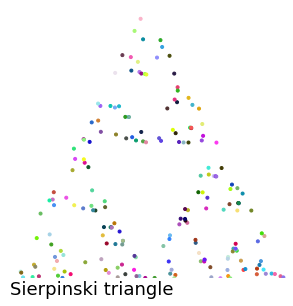

In [11]:
plot(sierpinski_triangle_1)

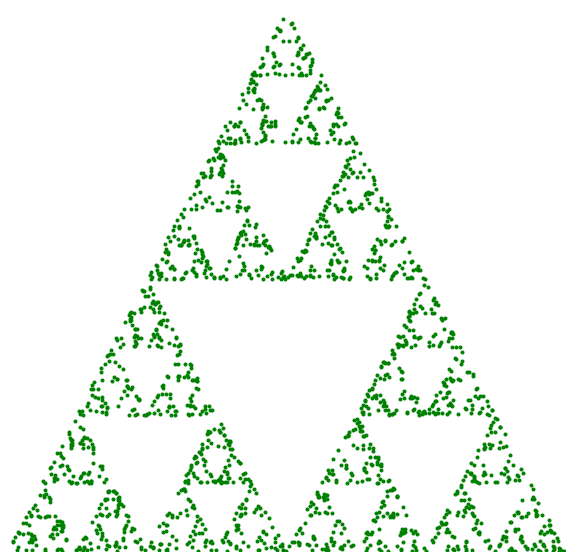

In [12]:
make_animation(sierpinski_triangle_2)